In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score, mean_squared_error, 
                             r2_score, mean_absolute_error, accuracy_score,
                             precision_score, recall_score, f1_score)


In [2]:
# Load dataset
user_data_df = pd.read_csv('streamworks_user_data.csv')

### Exploring the data

In [3]:
df = user_data_df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [5]:
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [6]:
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


##### missing data

In [7]:
df.isnull().sum()

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

user_id                 0.133333
age                     0.200000
gender                  0.066667
signup_date             0.133333
last_active_date        0.133333
country                 0.200000
subscription_type       0.200000
average_watch_hours     0.266667
mobile_app_usage_pct    0.133333
complaints_raised       0.200000
received_promotions     0.200000
referred_by_friend      0.200000
is_churned              0.066667
monthly_fee             9.666667
dtype: float64

### Handling missing values

##### user id

In [9]:
# USER ID
df[df['user_id'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
56,NaN,45.0,Male,16-03-25,13-07-25,UK,Basic,8.7,60.6,5.0,No,No,1.0,5.99
886,NaN,35.0,Female,16-09-23,13-07-25,USA,Basic,6.0,54.8,1.0,No,Yes,0.0,6.99


In [10]:
mask = df['user_id'].isna()
df.loc[mask, 'user_id'] = [f"TEMPID{i+1}" for i in range(mask.sum())]

In [11]:
df[df['user_id'].str.startswith('TEMP', na = False)]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
56,TEMPID1,45.0,Male,16-03-25,13-07-25,UK,Basic,8.7,60.6,5.0,No,No,1.0,5.99
886,TEMPID2,35.0,Female,16-09-23,13-07-25,USA,Basic,6.0,54.8,1.0,No,Yes,0.0,6.99


In [12]:
df[df['user_id'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Age

In [13]:
#AGE
df[df['age'].isna()][['user_id', 'age', 'country', 'gender', 'subscription_type', 'average_watch_hours']]

,user_id,age,country,gender,subscription_type,average_watch_hours
109,1110.0,NaN,France,Female,Standard,33.7
758,1759.0,NaN,France,Female,Premium,38.5
1130,2131.0,NaN,France,Female,Basic,69.8


In [14]:
df['age'].describe()

count    1497.000000
mean       43.738811
std        15.083920
min        18.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

In [15]:
df[(df['gender'] == 'Female') & (df['country'] == 'France')]['age'].describe()


count    95.00000
mean     45.00000
std      14.82881
min      18.00000
25%      34.00000
50%      46.00000
75%      56.00000
max      69.00000
Name: age, dtype: float64

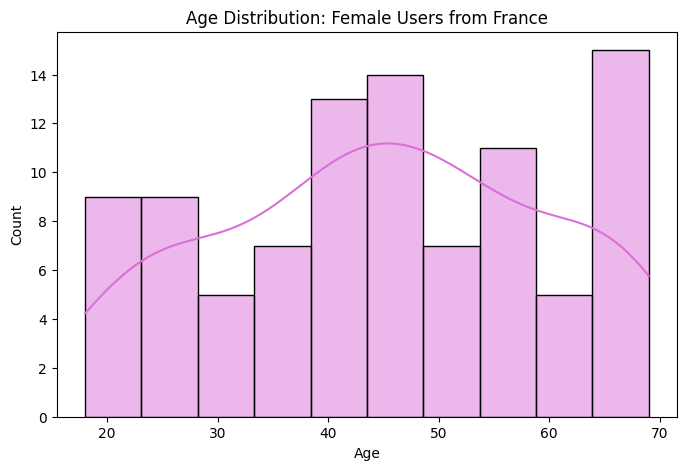

In [16]:
# Filter for females in France
df_france_female = df[(df['gender'] == 'Female') & (df['country'] == 'France')]

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df_france_female['age'], bins=10, kde=True, color='orchid')
plt.title('Age Distribution: Female Users from France')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
fill_median = (df[(df['gender'] == 'Female') & (df['country'] == 'France')]['age'].median())
fill_median

46.0

In [18]:
df['age'].fillna(fill_median, inplace = True)

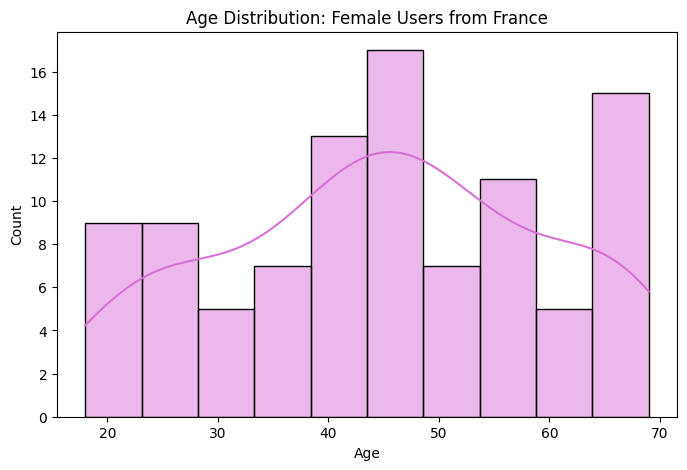

In [19]:
# Filter for females in France
df_france_female = df[(df['gender'] == 'Female') & (df['country'] == 'France')]

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df_france_female['age'], bins=10, kde=True, color='orchid')
plt.title('Age Distribution: Female Users from France')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [20]:
df[df['age'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


In [21]:
df['age'].dtype

dtype('float64')

In [22]:
df['age'] = df['age'].astype('int')

##### Gender

In [23]:
# GENDER
df[df['gender'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1095,2096.0,29,NaN,27-08-22,NaN,France,Basic,25.0,63.1,5.0,No,Yes,1.0,5.99


In [24]:
df['gender'].value_counts()

Female    510
Other     506
Male      483
Name: gender, dtype: int64

In [25]:
df[(df['country'] == 'France')]['gender'].value_counts()

Female    98
Other     87
Male      68
Name: gender, dtype: int64

/var/folders/hy/359lmhr93yndlkvjlcsgw40w0000gn/T/ipykernel_28951/1318192020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_france, x='gender', palette='pastel')


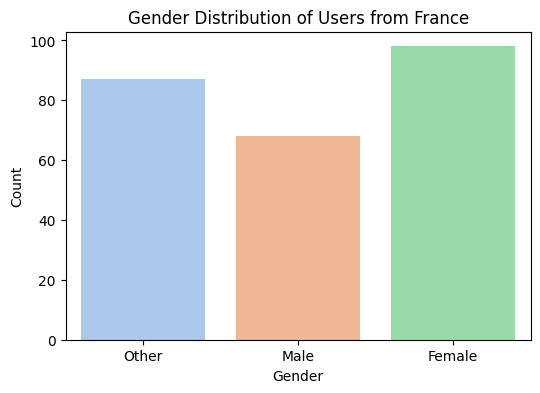

In [26]:
# Filter French users
df_france = df[df['country'] == 'France']

# Count plot for gender
plt.figure(figsize=(6,4))
sns.countplot(data=df_france, x='gender', palette='pastel')
plt.title('Gender Distribution of Users from France')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [27]:
df['gender'].fillna('Female', inplace = True)

In [28]:
df[df['gender'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Signup date

In [29]:
# SIGNUP DATE
df['signup_date'] = pd.to_datetime(df['signup_date'], format = '%d-%m-%y')


In [30]:
df[df['signup_date'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
52,1053.0,26,Male,NaT,13-07-25,Germany,Standard,6.7,49.1,1.0,Yes,Yes,0.0,10.99
644,1645.0,45,Other,NaT,13-07-25,Germany,Standard,50.7,0.7,0.0,Yes,No,1.0,10.99


In [31]:
df['signup_date'].describe()

/var/folders/hy/359lmhr93yndlkvjlcsgw40w0000gn/T/ipykernel_28951/3414994839.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['signup_date'].describe()


count                    1498
unique                    819
top       2024-05-30 00:00:00
freq                        6
first     2022-07-14 00:00:00
last      2025-07-12 00:00:00
Name: signup_date, dtype: object

In [32]:
df[df['country'] == 'Germany']['signup_date'].describe()

/var/folders/hy/359lmhr93yndlkvjlcsgw40w0000gn/T/ipykernel_28951/1805736918.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[df['country'] == 'Germany']['signup_date'].describe()


count                     244
unique                    225
top       2025-03-27 00:00:00
freq                        2
first     2022-07-28 00:00:00
last      2025-07-08 00:00:00
Name: signup_date, dtype: object

In [33]:
median_date = df[df['country'] == 'Germany']['signup_date'].median()

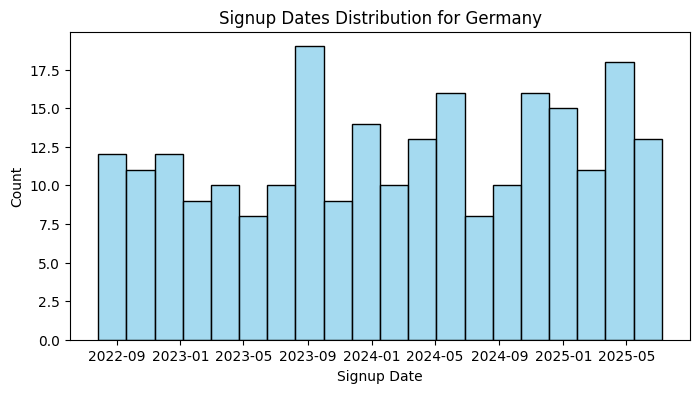

In [34]:
df_germany = df[df['country']=='Germany']
plt.figure(figsize=(8,4))
sns.histplot(pd.to_datetime(df_germany['signup_date']), bins=20, color='skyblue')
plt.title('Signup Dates Distribution for Germany')
plt.xlabel('Signup Date')
plt.ylabel('Count')
plt.show()

In [35]:
df['signup_date'].fillna(median_date, inplace= True)

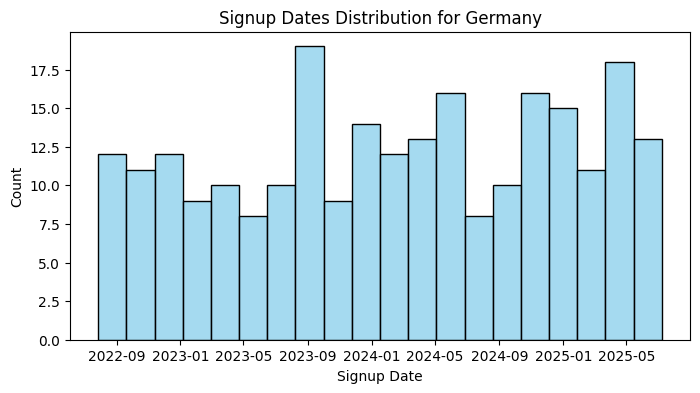

In [36]:
df_germany = df[df['country']=='Germany']
plt.figure(figsize=(8,4))
sns.histplot(pd.to_datetime(df_germany['signup_date']), bins=20, color='skyblue')
plt.title('Signup Dates Distribution for Germany')
plt.xlabel('Signup Date')
plt.ylabel('Count')
plt.show()

##### last active date

In [37]:
# LAST ACTIVE DATE
df['last_active_date'] = pd.to_datetime(df['last_active_date'], format = '%d-%m-%y')


In [38]:
df[df['last_active_date'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
101,1102.0,18,Other,2023-07-04,NaT,India,Basic,46.0,93.7,5.0,No,Yes,0.0,6.99
1095,2096.0,29,Female,2022-08-27,NaT,France,Basic,25.0,63.1,5.0,No,Yes,1.0,5.99


In [39]:
df['last_active_date'].describe()

/var/folders/hy/359lmhr93yndlkvjlcsgw40w0000gn/T/ipykernel_28951/715893378.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['last_active_date'].describe()


count                    1498
unique                      1
top       2025-07-13 00:00:00
freq                     1498
first     2025-07-13 00:00:00
last      2025-07-13 00:00:00
Name: last_active_date, dtype: object

In [40]:
df['last_active_date'].value_counts()

2025-07-13    1498
Name: last_active_date, dtype: int64

In [41]:
df['last_active_date'].mode()

0   2025-07-13
Name: last_active_date, dtype: datetime64[ns]

In [42]:
df['last_active_date'].fillna(df['last_active_date'].mode()[0], inplace = True)

In [43]:
df[df['last_active_date'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Country

In [44]:
# COUNTRY
df['country'].value_counts()

Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
Name: country, dtype: int64

In [45]:
df[df['country'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
531,1532.0,47,Female,2023-01-23,2025-07-13,NaN,Basic,60.3,54.9,1.0,Yes,Yes,0.0,5.99
1125,2126.0,28,Female,2025-01-30,2025-07-13,NaN,Standard,NaN,28.2,NaN,No,NaN,0.0,9.99
1482,2483.0,19,Other,2024-06-24,2025-07-13,NaN,Premium,33.4,44.1,1.0,No,No,0.0,13.99


In [46]:
df.groupby('gender')['country'].value_counts().unstack()

country,Canada,France,Germany,India,UK,USA
gender,,,,,,
Female,90,99,85,76,78,81
Male,79,68,89,91,79,77
Other,93,87,72,92,84,77


In [47]:
df['country'] = df.groupby('gender')['country'].transform(lambda x: x.fillna(x.mode()[0]))

In [48]:
df[df['country'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Subscription Type

In [49]:
# SUBSCRIPTION TYPE
df['subscription_type'].value_counts()

Basic       505
Premium     499
Standard    493
Name: subscription_type, dtype: int64

In [50]:
df[df['subscription_type'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
110,1111.0,28,Female,2023-06-09,2025-07-13,France,NaN,37.2,68.7,4.0,Yes,Yes,0.0,9.99
145,1146.0,22,Other,2024-07-10,2025-07-13,Canada,NaN,78.6,86.7,0.0,No,No,0.0,13.99
1094,2095.0,66,Other,2023-01-18,2025-07-13,India,NaN,NaN,20.7,3.0,Yes,Yes,0.0,9.99


In [51]:
df.groupby(['subscription_type'])['monthly_fee'].value_counts().unstack(fill_value=0)

monthly_fee,5.99,6.99,9.99,10.99,13.99,14.99
subscription_type,,,,,,
Basic,352,112,0,0,0,0
Premium,0,0,0,0,343,106
Standard,0,0,343,96,0,0


In [52]:
fee_to_type = {5.99: 'Basic', 6.99: 'Basic', 9.99: 'Standard', 10.99: 'Standard', 13.99: 'Premium', 14.99: 'Premium'}
df['subscription_type'] = df.apply(lambda row: fee_to_type.get(row['monthly_fee'], row['subscription_type']), axis = 1)


In [53]:
df[df['subscription_type'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Average Watch Hours

In [54]:
df['average_watch_hours'].describe()

count    1496.000000
mean       39.903342
std        22.978288
min         0.500000
25%        19.450000
50%        40.300000
75%        59.800000
max        79.900000
Name: average_watch_hours, dtype: float64

In [55]:
df[df['average_watch_hours'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
111,1112.0,68,Female,2025-04-27,2025-07-13,Canada,Standard,NaN,2.4,2.0,Yes,Yes,1.0,9.99
438,1439.0,29,Male,2023-03-01,2025-07-13,India,Basic,NaN,88.9,1.0,Yes,Yes,0.0,5.99
1094,2095.0,66,Other,2023-01-18,2025-07-13,India,Standard,NaN,20.7,3.0,Yes,Yes,0.0,9.99
1125,2126.0,28,Female,2025-01-30,2025-07-13,France,Standard,NaN,28.2,NaN,No,NaN,0.0,9.99


In [56]:
df.groupby(['subscription_type', 'gender'])['average_watch_hours'].mean().unstack()


gender,Female,Male,Other
subscription_type,,,
Basic,40.221762,40.256081,39.603681
Premium,42.419048,36.063043,39.634320
Standard,40.466864,37.530667,43.245087


In [57]:
df.groupby(['subscription_type',pd.cut(df['age'], bins=[0, 25, 40, 60, 100])])['average_watch_hours'].mean().unstack()

age,"(0, 25]","(25, 40]","(40, 60]","(60, 100]"
subscription_type,,,,
Basic,39.790123,38.862044,40.209948,41.567368
Premium,40.214458,33.728926,42.562944,38.035354
Standard,42.081081,36.525926,41.976329,42.313158


<Axes: title={'center': 'Average Watch Hours by Age'}, xlabel='age'>

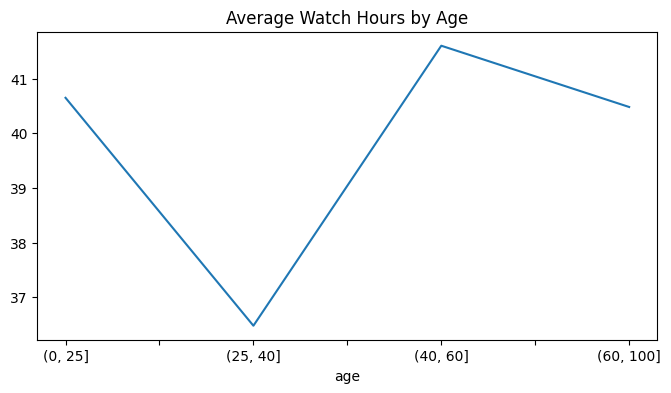

In [58]:
df.groupby(pd.cut(df['age'], bins=[0, 25, 40, 60, 100]))['average_watch_hours'].mean().plot(kind='line', figsize=(8,4), title='Average Watch Hours by Age')


In [59]:
df['average_watch_hours'] = df.groupby(['subscription_type', pd.cut(df['age'], bins=[0, 25, 40, 60, 100])])['average_watch_hours'].transform(lambda x: x.fillna(x.mean()))

In [60]:
df[df['average_watch_hours'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### Mobile app usage percentage

In [61]:
df['mobile_app_usage_pct'].describe()

count    1498.000000
mean       51.414419
std        28.580117
min         0.000000
25%        27.100000
50%        52.700000
75%        76.200000
max       100.000000
Name: mobile_app_usage_pct, dtype: float64

In [62]:
df[df['mobile_app_usage_pct'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1083,2084.0,68,Other,2025-03-11,2025-07-13,France,Basic,10.7,NaN,3.0,NaN,Yes,1.0,5.99
1090,2091.0,36,Male,2023-10-04,2025-07-13,France,Basic,78.4,NaN,2.0,Yes,No,1.0,6.99


In [63]:
df['mobile_app_usage_pct'].mean()

51.41441922563417

In [64]:
df['mobile_app_usage_pct'].fillna(df['mobile_app_usage_pct'].mean(), inplace= True)

In [65]:
df[df['mobile_app_usage_pct'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### complaints raised

In [66]:
df[df['complaints_raised'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
231,1232.0,40,Other,2025-03-20,2025-07-13,Germany,Basic,15.900000,73.7,NaN,No,Yes,0.0,5.99
1125,2126.0,28,Female,2025-01-30,2025-07-13,France,Standard,36.525926,28.2,NaN,No,NaN,0.0,9.99
1496,2497.0,54,Male,2025-02-12,2025-07-13,USA,Basic,48.700000,42.0,NaN,Yes,Yes,1.0,NaN


In [67]:
df['complaints_raised'].fillna(0.0, inplace= True)

In [68]:
df[df['complaints_raised'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


In [69]:
df['complaints_raised'].dtype

dtype('float64')

In [70]:
df['complaints_raised'] = df['complaints_raised'].astype('int')

##### received promotions

In [71]:
df[df['received_promotions'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
337,1338.0,31,Other,2024-12-14,2025-07-13,USA,Basic,60.1,18.000000,4,NaN,No,1.0,6.99
1083,2084.0,68,Other,2025-03-11,2025-07-13,France,Basic,10.7,51.414419,3,NaN,Yes,1.0,5.99
1130,2131.0,46,Female,2024-04-18,2025-07-13,France,Basic,69.8,99.200000,4,NaN,No,1.0,5.99


In [72]:
df['received_promotions'].value_counts()

No     763
Yes    734
Name: received_promotions, dtype: int64

In [73]:
df['received_promotions'].fillna(df['received_promotions'].mode()[0], inplace = True)

In [74]:
df[df['received_promotions'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### referred by friend

In [75]:
df[df['referred_by_friend'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1088,2089.0,43,Other,2024-11-13,2025-07-13,India,Basic,50.100000,53.0,2,Yes,NaN,NaN,5.99
1125,2126.0,28,Female,2025-01-30,2025-07-13,France,Standard,36.525926,28.2,0,No,NaN,0.0,9.99
1485,2486.0,56,Other,2022-10-16,2025-07-13,Canada,Premium,12.200000,61.9,0,Yes,NaN,0.0,13.99


In [76]:
df['referred_by_friend'].value_counts()

Yes    752
No     745
Name: referred_by_friend, dtype: int64

In [77]:
df['referred_by_friend'].fillna(df['referred_by_friend'].mode()[0], inplace = True)

In [78]:
df[df['referred_by_friend'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


##### is churned

In [79]:
df[df['is_churned'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1088,2089.0,43,Other,2024-11-13,2025-07-13,India,Basic,50.1,53.0,2,Yes,Yes,NaN,5.99


In [80]:
df = df.dropna(subset=['is_churned'])

In [81]:
df[df['is_churned'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee


In [82]:
df['is_churned'] = df['is_churned'].astype(int)

##### monthly fee

In [83]:
df[df['monthly_fee'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
8,1009.0,36,Other,2025-05-30,2025-07-13,UK,Standard,11.6,82.7,1,No,Yes,0,NaN
10,1011.0,28,Other,2022-11-26,2025-07-13,USA,Standard,21.7,17.7,0,No,No,0,NaN
15,1016.0,41,Female,2022-12-06,2025-07-13,UK,Standard,46.1,54.5,1,Yes,No,0,NaN
21,1022.0,47,Other,2024-12-01,2025-07-13,UK,Premium,76.7,20.7,4,Yes,Yes,0,NaN
27,1028.0,39,Other,2023-06-21,2025-07-13,India,Standard,35.3,46.1,3,Yes,No,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2477.0,67,Female,2023-06-23,2025-07-13,Canada,Basic,78.2,69.7,2,No,No,0,NaN
1478,2479.0,34,Other,2022-09-19,2025-07-13,USA,Standard,11.3,23.4,3,Yes,Yes,0,NaN
1483,2484.0,62,Male,2025-04-08,2025-07-13,UK,Premium,31.9,13.2,5,No,Yes,0,NaN
1486,2487.0,26,Female,2024-07-27,2025-07-13,France,Standard,39.3,45.4,1,No,Yes,1,NaN


In [84]:
df.groupby(['subscription_type'])['monthly_fee'].value_counts().unstack(fill_value= 0)


monthly_fee,5.99,6.99,9.99,10.99,13.99,14.99
subscription_type,,,,,,
Basic,351,112,0,0,0,0
Premium,0,0,0,0,344,106
Standard,0,0,345,96,0,0


In [85]:
df['monthly_fee'] = df.groupby('subscription_type')['monthly_fee'].transform(lambda x: x.fillna(x.mode()[0]))

In [86]:
df.isnull().sum()

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
dtype: int64

### Correlation matrix

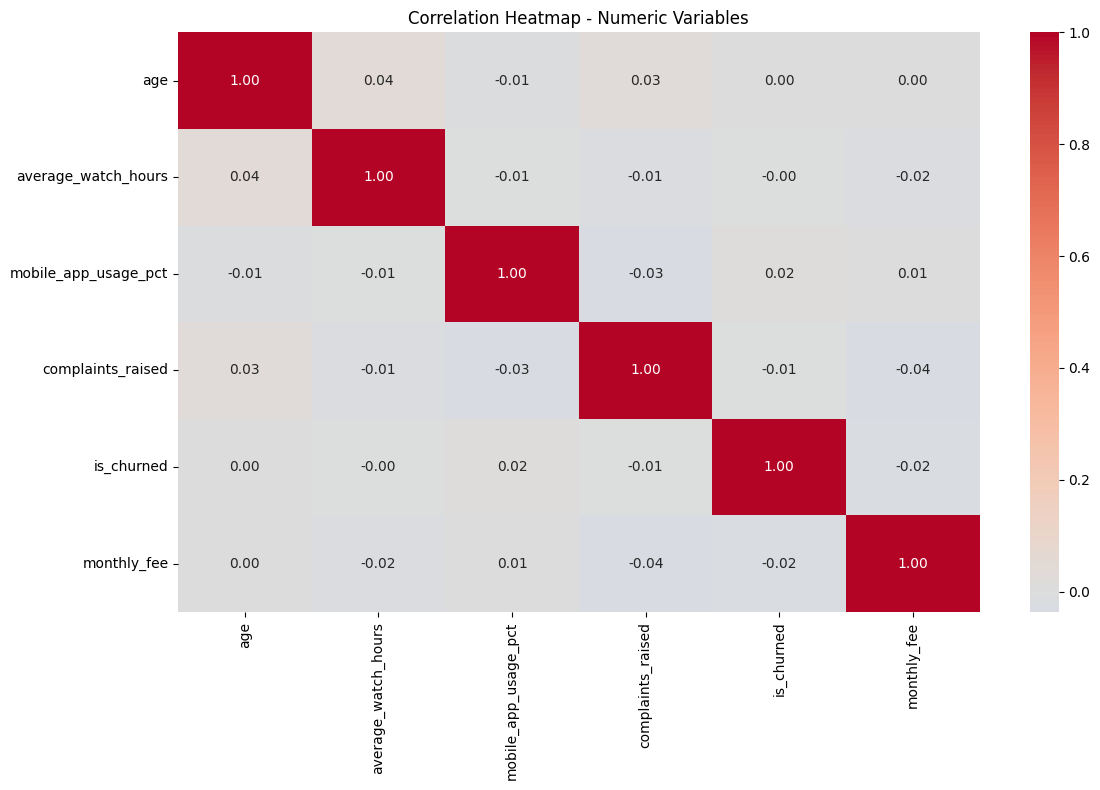

In [87]:
correlation_matrix = df.corr()
# print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Numeric Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


### Create new features

In [88]:
# Create new features
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = np.where(df['tenure_days'] > 180, 1, 0)

In [89]:
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']

In [90]:
df['heavy_mobile_user'] = (df['mobile_app_usage_pct'] > 70).astype(int)

In [91]:
# low_watch_time (if watch hours < 20)
df['low_watch_time'] = (df['average_watch_hours'] < 20).astype(int)

# interaction feature: received_promotions AND low_watch_time
df['promo_low_watch'] = df['received_promotions'] * df['low_watch_time']

In [92]:
df.isnull().sum()

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
watch_per_fee_ratio     0
heavy_mobile_user       0
low_watch_time          0
promo_low_watch         0
dtype: int64

In [93]:
df.dtypes

user_id                         object
age                              int64
gender                          object
signup_date             datetime64[ns]
last_active_date        datetime64[ns]
country                         object
subscription_type               object
average_watch_hours            float64
mobile_app_usage_pct           float64
complaints_raised                int64
received_promotions             object
referred_by_friend              object
is_churned                       int64
monthly_fee                    float64
tenure_days                      int64
is_loyal                         int64
watch_per_fee_ratio            float64
heavy_mobile_user                int64
low_watch_time                   int64
promo_low_watch                 object
dtype: object

In [94]:
# Convert blanks or invalid entries in promo_low_watch to 0
df['promo_low_watch'] = df['promo_low_watch'].replace(['', ' ', None, np.nan], 'No')


In [95]:
df['promo_low_watch'].value_counts()

No     1317
Yes     182
Name: promo_low_watch, dtype: int64

### Encoding variables

In [96]:
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal,watch_per_fee_ratio,heavy_mobile_user,low_watch_time,promo_low_watch
0,1001.0,56,Other,2025-04-02,2025-07-13,France,Standard,42.6,77.4,1,No,No,1,10.99,102,0,3.876251,1,0,No
1,1002.0,69,Male,2023-01-02,2025-07-13,India,Basic,65.3,98.0,4,No,Yes,1,5.99,923,1,10.901503,1,0,No
2,1003.0,46,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0,No,Yes,1,13.99,1057,1,2.866333,0,0,No
3,1004.0,32,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1,Yes,Yes,1,13.99,668,1,0.414582,0,1,Yes
4,1005.0,60,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5,No,Yes,0,9.99,715,1,3.273273,0,0,No


In [97]:
# Binary encoding for binary categorical variables
binary_mappings = {
    'received_promotions': {'Yes': 1, 'No': 0},
    'referred_by_friend': {'Yes': 1, 'No': 0},
    'promo_low_watch' : {'Yes': 1, 'No': 0}}

for col, mapping in binary_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"{col}: Encoded")


# One-hot encoding for country and subscription_type
df = pd.get_dummies(df, columns=['subscription_type'], drop_first=True)
df = pd.get_dummies(df, columns=['country'], prefix='country', drop_first=True)

# converting age to age_group and then applying one hot encoding
bins = [0, 24, 34, 44, 54, 64, 120]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['age_group'], prefix='age', drop_first=True)
print(f"subscription_type, country, age: One-hot encoded")

enc_cols = {}
# Label encoding gender
le = LabelEncoder()
df['gender_le'] = le.fit_transform(df['gender'])
enc_cols['gender_le'] = 'label'
print(f"gender: Label encoded")

received_promotions: Encoded
referred_by_friend: Encoded
promo_low_watch: Encoded
subscription_type, country, age: One-hot encoded
gender: Label encoded


In [98]:
df.head()

,user_id,age,gender,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,...,country_Germany,country_India,country_UK,country_USA,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,gender_le
0,1001.0,56,Other,2025-04-02,2025-07-13,42.6,77.4,1,0,0,...,0,0,0,0,0,0,0,1,0,2
1,1002.0,69,Male,2023-01-02,2025-07-13,65.3,98.0,4,0,1,...,0,1,0,0,0,0,0,0,1,1
2,1003.0,46,Male,2022-08-21,2025-07-13,40.1,47.8,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,1004.0,32,Other,2023-09-14,2025-07-13,5.8,53.2,1,1,1,...,1,0,0,0,1,0,0,0,0,2
4,1005.0,60,Female,2023-07-29,2025-07-13,32.7,16.8,5,0,1,...,0,1,0,0,0,0,0,1,0,0


In [99]:
df['complaint_flag'] = df['complaints_raised'].apply(lambda x: 1 if x > 0 else 0)

In [100]:
df.isna().sum()

user_id                       0
age                           0
gender                        0
signup_date                   0
last_active_date              0
average_watch_hours           0
mobile_app_usage_pct          0
complaints_raised             0
received_promotions           0
referred_by_friend            0
is_churned                    0
monthly_fee                   0
tenure_days                   0
is_loyal                      0
watch_per_fee_ratio           0
heavy_mobile_user             0
low_watch_time                0
promo_low_watch               0
subscription_type_Premium     0
subscription_type_Standard    0
country_France                0
country_Germany               0
country_India                 0
country_UK                    0
country_USA                   0
age_25-34                     0
age_35-44                     0
age_45-54                     0
age_55-64                     0
age_65+                       0
gender_le                     0
complain

In [101]:
print(f"Total Features: {df.shape[1]}")

Total Features: 32


### chi square test

In [102]:
df.head()

,user_id,age,gender,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,...,country_India,country_UK,country_USA,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,gender_le,complaint_flag
0,1001.0,56,Other,2025-04-02,2025-07-13,42.6,77.4,1,0,0,...,0,0,0,0,0,0,1,0,2,1
1,1002.0,69,Male,2023-01-02,2025-07-13,65.3,98.0,4,0,1,...,1,0,0,0,0,0,0,1,1,1
2,1003.0,46,Male,2022-08-21,2025-07-13,40.1,47.8,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1004.0,32,Other,2023-09-14,2025-07-13,5.8,53.2,1,1,1,...,0,0,0,1,0,0,0,0,2,1
4,1005.0,60,Female,2023-07-29,2025-07-13,32.7,16.8,5,0,1,...,1,0,0,0,0,0,1,0,0,1


In [103]:
cat_tests = ['gender','received_promotions','referred_by_friend','heavy_mobile_user']
chi_results = {}
for col in cat_tests:
    if col in df.columns:
        ct = pd.crosstab(df[col], df['is_churned'])
    try:
        chi2, p, dof, ex = chi2_contingency(ct)
        chi_results[col] = {'chi2':chi2,'p_value':p}
    except Exception as e:
        chi_results[col] = {'error':str(e)}


print('\nChi-square test results:')
for k,v in chi_results.items():
    print(k, v)


Chi-square test results:
gender {'chi2': 4.424236630705249, 'p_value': 0.10946851390153048}
received_promotions {'chi2': 2.569079144582524, 'p_value': 0.1089711488386035}
referred_by_friend {'chi2': 0.7403934174412926, 'p_value': 0.3895348816283575}
heavy_mobile_user {'chi2': 0.13515683601503423, 'p_value': 0.7131440515972632}


### t square

In [104]:
churn_watch = df.loc[df['is_churned']==1, 'average_watch_hours'].dropna()
retain_watch = df.loc[df['is_churned']==0, 'average_watch_hours'].dropna()
tstat, pval = ttest_ind(churn_watch, retain_watch, equal_var=False)
print('\nT-test for average_watch_hours: t-stat =', tstat, 'p-value =', pval)


T-test for average_watch_hours: t-stat = -0.1733965118422404 p-value = 0.8624009411691611


### Visualisations

([<matplotlib.axis.XTick at 0x12e6143a0>,
 [Text(0, 0, 'Retained'), Text(1, 0, 'Churned')])

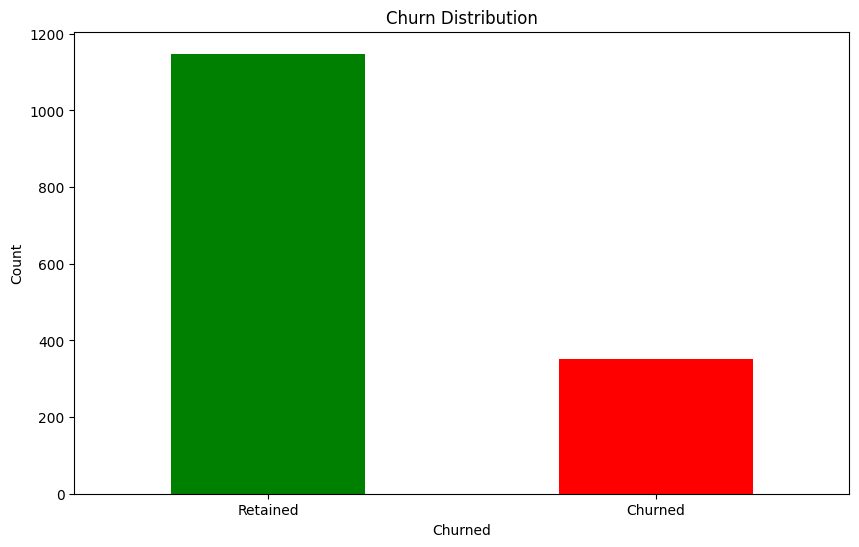

In [ ]:
# Churn distribution
plt.figure(figsize=(10, 6))
churn_by_sub = df.groupby(['is_churned']).size()
churn_by_sub.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)

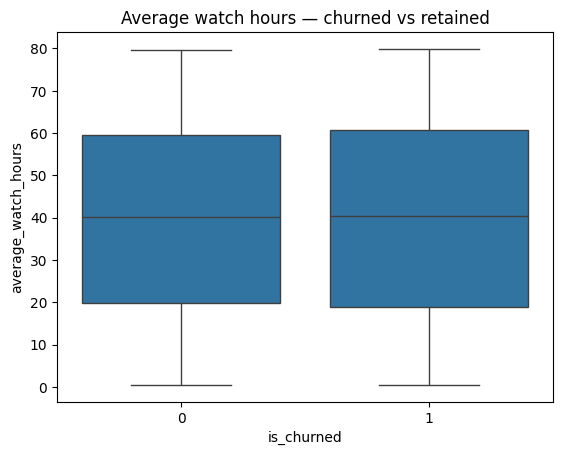

In [106]:
plt.figure()
sns.boxplot(x='is_churned', y='average_watch_hours', data=df)
plt.title('Average watch hours — churned vs retained')
plt.show()

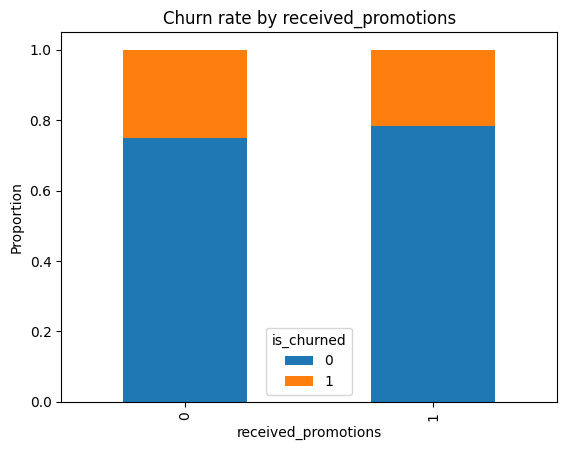

In [107]:
promo_churn = pd.crosstab(df['received_promotions'], df['is_churned'], normalize='index')
promo_churn.plot(kind='bar', stacked=True)
plt.title('Churn rate by received_promotions')
plt.ylabel('Proportion')
plt.show()

In [172]:
promo_churn

is_churned,0,1
received_promotions,,
0,0.748042,0.251958
1,0.784447,0.215553


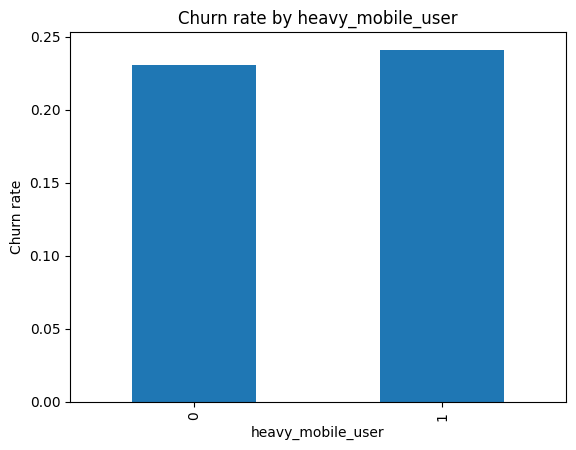

In [108]:
# Mobile usage by churn
mob = df.groupby('heavy_mobile_user')['is_churned'].mean()
mob.plot(kind='bar')
plt.title('Churn rate by heavy_mobile_user')
plt.ylabel('Churn rate')
plt.show()

In [173]:
mob

heavy_mobile_user
0    0.23092
1    0.24109
Name: is_churned, dtype: float64

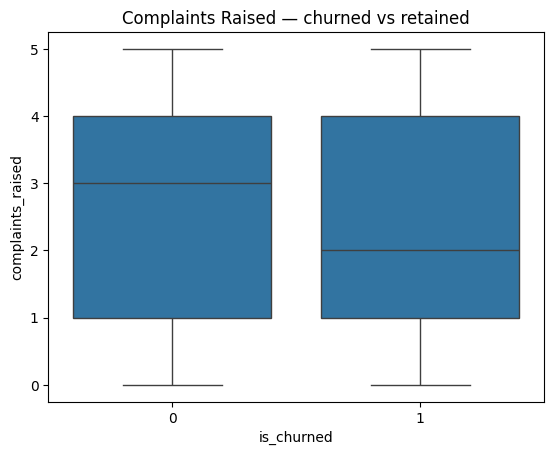

In [109]:
# Complaints by churn
sns.boxplot(x='is_churned', y='complaints_raised', data=df)
plt.title('Complaints Raised — churned vs retained')
plt.show()

### Logistic Regression model

In [110]:
df.columns

Index(['user_id', 'age', 'gender', 'signup_date', 'last_active_date',
       'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised',
       'received_promotions', 'referred_by_friend', 'is_churned',
       'monthly_fee', 'tenure_days', 'is_loyal', 'watch_per_fee_ratio',
       'heavy_mobile_user', 'low_watch_time', 'promo_low_watch',
       'subscription_type_Premium', 'subscription_type_Standard',
       'country_France', 'country_Germany', 'country_India', 'country_UK',
       'country_USA', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65+', 'gender_le', 'complaint_flag'],
      dtype='object')

In [165]:
# Prepare features and target
exclude_cols = ['user_id', 'age', 'gender', 'signup_date', 'last_active_date', 'is_churned', 
                 'watch_per_fee_ratio', 'heavy_mobile_user', 'low_watch_time', 'promo_low_watch', 'tenure_days']
feature_cols = [col for col in df.columns if col not in exclude_cols ]


In [166]:
X = df[feature_cols]
y = df['is_churned']

print(f"Features used: {len(feature_cols)}")
print(f"Target variable: is_churned")
print(f"Class distribution: Retained={sum(y==0)}, Churned={sum(y==1)}")

Features used: 21
Target variable: is_churned
Class distribution: Retained=1148, Churned=351


In [167]:
# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Train set size: {X_train.shape[0]} (Churned: {sum(y_train==1)})")
print(f"Test set size: {X_test.shape[0]} (Churned: {sum(y_test==1)})")

Train set size: 1124 (Churned: 263)
Test set size: 375 (Churned: 88)


#### Model 1

Confusion Matrix:
True Negatives: 287 | False Positives: 0
False Negatives: 88 | True Positives: 0
Classification Report:
              precision    recall  f1-score   support

    Retained       0.77      1.00      0.87       287
     Churned       0.00      0.00      0.00        88

    accuracy                           0.77       375
   macro avg       0.38      0.50      0.43       375
weighted avg       0.59      0.77      0.66       375

ROC AUC: 0.5079585049097244


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

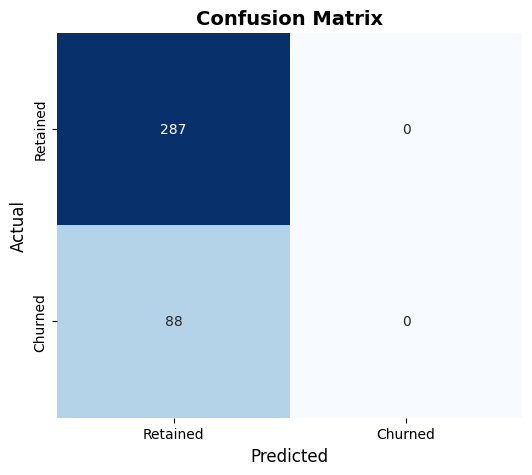

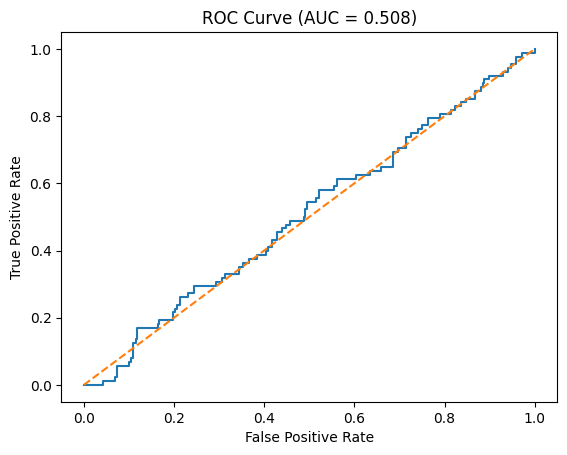

Top predictors (by absolute coefficient):                        feature      coef  abs_coef
3          received_promotions -0.308642  0.308642
6                     is_loyal  0.264898  0.264898
11               country_India  0.210246  0.210246
9               country_France  0.176844  0.176844
8   subscription_type_Standard  0.164576  0.164576
19                   gender_le -0.152071  0.152071
15                   age_35-44  0.133567  0.133567
18                     age_65+  0.125287  0.125287
12                  country_UK  0.116922  0.116922
10             country_Germany  0.110003  0.110003


In [168]:
# Fit model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]


print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"True Negatives: {cm[0,0]} | False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]} | True Positives: {cm[1,1]}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

auc = roc_auc_score(y_test, y_proba)
print('ROC AUC:', auc)


# ROC curve plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title(f'ROC Curve (AUC = {auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Coefficients interpretation
coeffs = pd.DataFrame({'feature':feature_cols, 'coef':logreg.coef_[0]})
coeffs['abs_coef'] = coeffs['coef'].abs()
coeffs = coeffs.sort_values('abs_coef', ascending=False)
print('Top predictors (by absolute coefficient):', coeffs.head(10))


Logistic Regression model trained (with class balancing)
Model Evaluation:
Accuracy: 0.5600
Precision: 0.2749
Recall: 0.5341
F1-Score: 0.3629
Confusion Matrix:
True Negatives: 163 | False Positives: 124
False Negatives: 41 | True Positives: 47
Classification Report:
              precision    recall  f1-score   support

    Retained       0.80      0.57      0.66       287
     Churned       0.27      0.53      0.36        88

    accuracy                           0.56       375
   macro avg       0.54      0.55      0.51       375
weighted avg       0.68      0.56      0.59       375

ROC-AUC Score: 0.5376


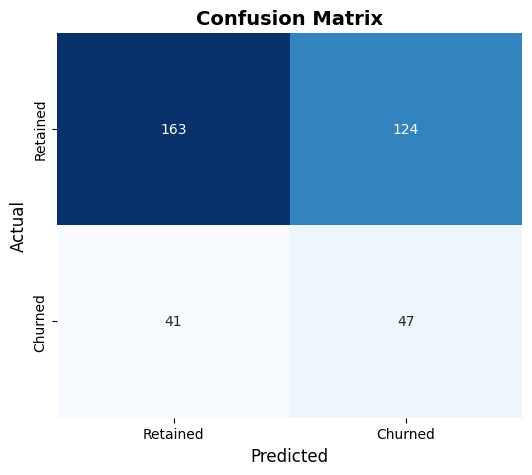

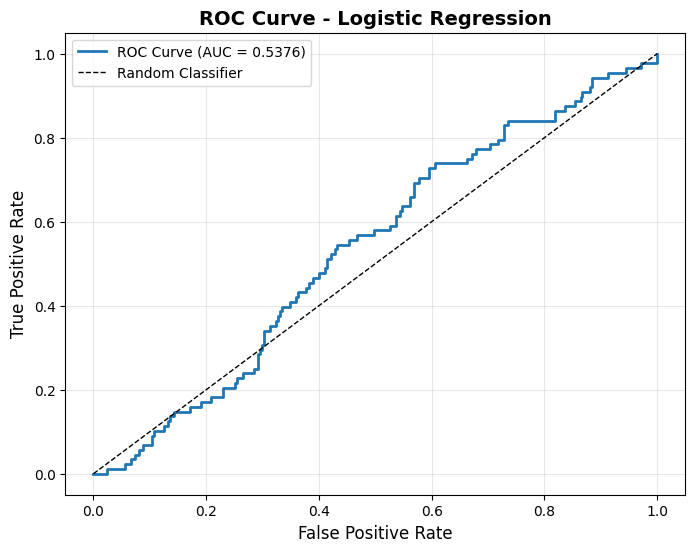

Top predictors (by absolute coefficient):                        feature      coef  abs_coef
3          received_promotions -0.308642  0.308642
6                     is_loyal  0.264898  0.264898
11               country_India  0.210246  0.210246
9               country_France  0.176844  0.176844
8   subscription_type_Standard  0.164576  0.164576
19                   gender_le -0.152071  0.152071
15                   age_35-44  0.133567  0.133567
18                     age_65+  0.125287  0.125287
12                  country_UK  0.116922  0.116922
10             country_Germany  0.110003  0.110003


In [169]:
# Train Logistic Regression with class weighting to handle imbalance
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', 
                             C=0.001, solver='liblinear')
log_reg.fit(X_train, y_train)

print("Logistic Regression model trained (with class balancing)")

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Model Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"True Negatives: {cm[0,0]} | False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]} | True Positives: {cm[1,1]}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# ROC-AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()



# Coefficients interpretation
coeffs = pd.DataFrame({'feature':feature_cols, 'coef':logreg.coef_[0]})
coeffs['abs_coef'] = coeffs['coef'].abs()
coeffs = coeffs.sort_values('abs_coef', ascending=False)
print('Top predictors (by absolute coefficient):', coeffs.head(10))

### Linear Regression Model

In [147]:
df.columns

Index(['user_id', 'age', 'gender', 'signup_date', 'last_active_date',
       'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised',
       'received_promotions', 'referred_by_friend', 'is_churned',
       'monthly_fee', 'tenure_days', 'is_loyal', 'watch_per_fee_ratio',
       'heavy_mobile_user', 'low_watch_time', 'promo_low_watch',
       'subscription_type_Premium', 'subscription_type_Standard',
       'country_France', 'country_Germany', 'country_India', 'country_UK',
       'country_USA', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65+', 'gender_le', 'complaint_flag'],
      dtype='object')

In [148]:
# Target and Features
target = 'average_watch_hours'

exclude_cols = ['user_id', 'signup_date', 'last_active_date', 'age', 'gender', 'average_watch_hours', 'is_churned', 'is_loyal']
feature_cols = [col for col in df.columns if col not in exclude_cols]

X = df[feature_cols].copy()
y = df[target].copy()

\Linear Regression Results
R2 Score: 0.9044
RMSE: 7.0410
MAE: 5.8399


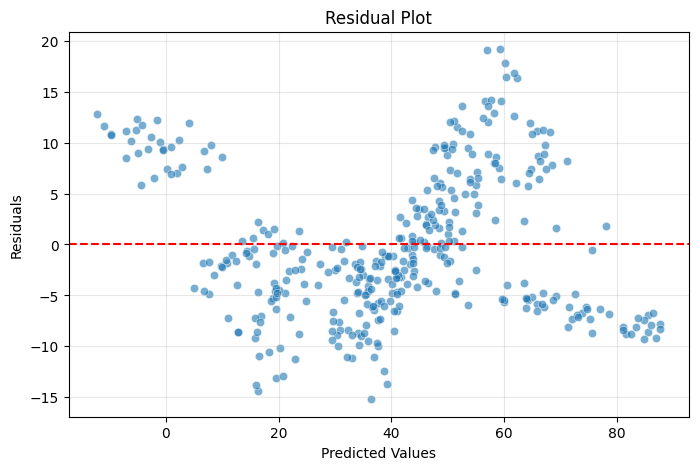


Top 10 Positive Influencers on Watch Hours:
            Feature  Coefficient
        monthly_fee    13.567643
watch_per_fee_ratio     6.753966
  heavy_mobile_user     1.304102
received_promotions     1.292129
        country_USA     0.989189
     complaint_flag     0.941980
         country_UK     0.938171
    country_Germany     0.614685
            age_65+     0.530943
          age_45-54     0.374379

Top 10 Negative Influencers on Watch Hours:
                  Feature  Coefficient
                gender_le    -0.267213
     mobile_app_usage_pct    -0.279013
           country_France    -0.290496
                age_55-64    -0.401224
              tenure_days    -0.456002
                age_25-34    -0.582423
                age_35-44    -0.772783
          promo_low_watch    -1.345374
           low_watch_time    -9.028611
subscription_type_Premium    -9.157289


In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale only numeric continuous features
scale_cols = ['monthly_fee', 'mobile_app_usage_pct', 'complaints_raised', 'tenure_days']
other_cols = [c for c in feature_cols if c not in scale_cols]

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('scale', StandardScaler(), scale_cols),
    ('keep', 'passthrough', other_cols)
])

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Results")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()


# Get the actual column order used by ColumnTransformer
all_cols = scale_cols + other_cols

coef_df = pd.DataFrame({
    'Feature': all_cols,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Top 10 Positive Influencers on Watch Hours:")
print(coef_df.head(10).to_string(index=False))

print("Top 10 Negative Influencers on Watch Hours:")
print(coef_df.tail(10).to_string(index=False))